## 1. Supervised Learning in the Ising Model
This question is based on our in-class tutorial which focused on generating the first figure in J.
Carrasquilla and R. G. Melko, Nat. Phys. 13, 431 (2017). https://arxiv.org/abs/1605.01735

Using the Monte Carlo code we wrote in class, I generated 16000 2D Ising spin configurations with
L = 30 (Ising2D_config_L30.dat.gz), labelled them with 1 = T > Tc, 0 = T < Tc,
(Ising2D\_labels\_L30.dat) and stored the temperatures at which the configurations were generated
(Ising2D\_temps\_L30.dat). These are available in the course repository in the data
folder.
### Part a 
Create a randomized train/validate/test split from the data and encode the labels as 1-hot
vectors. Until now we have only used a single split for training and testing. When we want
to evaluate a network after tuning hyperparamters it is considered best-practice to keep a
subset of data that the network never sees until final testing. This provides a fully unbiased
estimate of generalization and accuracy. While there are no absolute rules, 80/10/10 is
common.
### Part b
Train a neural network (architecture of your choice) until the accuracy converges. Plot both
the accuracy and cost as function of training epoch. Make sure to discuss any possible evidence
of overfitting.
### Part c
Study the effects of adjusting hyperparamters. You can consider: Training algorithm (stochastic
gradient descent, adam, . . . ), number of layers, number of neurons, DNN, CNN, etc. Make
sure to record the training log for each of these changes.
### Part d
Check your final accuracy using the test data set. Make sure to clearly display your final
accuracy.
### Part e
Study your network’s performance as a function of temperature. Make a plot of the:

i. average accuracy as a function of temperature,

ii. average output from each of the two output neurons (soft-max) as a function of temperature.
    
Compare your results with Figure 1 of the Carrasquilla and Melko reference. Hint: look into np.unique() to simplify your code.

In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
x = np.loadtxt('data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('data/Ising2D_labels_L30.dat')
Tval = np.loadtxt('data/Ising2D_temps_L30.dat')

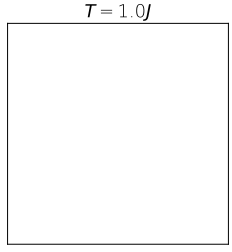

In [3]:
from IPython.display import clear_output,display
from time import sleep

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))

L = 30
for i,cx in enumerate(x[::50]):

    clear_output(wait=True)
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
    img = ax.matshow(cx.reshape(L,L), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'$T = {Tval[50*i]:.1f}J$')
    plt.pause(0.01)

    plt.show()

In [10]:
x_train,x_tmp,y_train,y_tmp=train_test_split(x,y,test_size=0.2)
x_valid,x_test,y_valid,y_test= train_test_split(x_tmp,y_tmp,test_size=0.5)

y_train_hot=keras.utils.to_categorical(y_train,2)
y_valid_hot=keras.utils.to_categorical(y_valid,2)
y_test_hot=keras.utils.to_categorical(y_test,2)

In [11]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                9010      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 84        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
Total params: 9,324
Trainable params: 9,324
Non-trainable params: 0
_________________________________________________________________


In [12]:
#training
batch_size=64
epochs=10

training_history={}
training_history['10-20-4_DNN_adam']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.9214 - val_loss: 0.0669 - val_accuracy: 0.9781
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0373 - val_accuracy: 0.9869
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0402 - val_accuracy: 0.9837
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0224 - val_accuracy: 0.9900
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.0205 - val_accuracy: 0.9906
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0182 - val_accuracy: 0.9937
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0311 - val_accuracy: 0.9881
Epoch 

Text(0.5, 0.95, '0.99')

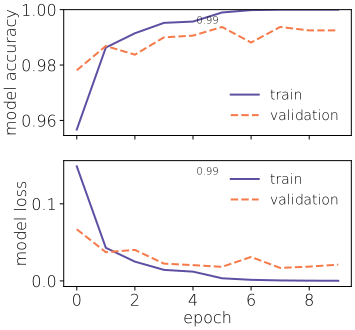

In [13]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['10-20-4_DNN_adam'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['10-20-4_DNN_adam'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['10-20-4_DNN_adam'].history['loss'], color=colors[0])
ax[1].plot(training_history['10-20-4_DNN_adam'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                9010      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 10        
Total params: 9,494
Trainable params: 9,494
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8254 - val_loss: 0.3047

Text(0.5, 0.95, '0.99')

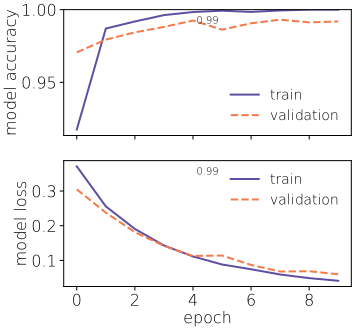

In [17]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#training
batch_size=64
epochs=10

training_history={}
training_history['10-20-10-4_DNN_adam']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['10-20-10-4_DNN_adam'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['10-20-10-4_DNN_adam'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['10-20-10-4_DNN_adam'].history['loss'], color=colors[0])
ax[1].plot(training_history['10-20-10-4_DNN_adam'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                9010      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
Total params: 9,494
Trainable params: 9,494
Non-trainable params: 0
____________________________________________________

Text(0.5, 0.95, '0.99')

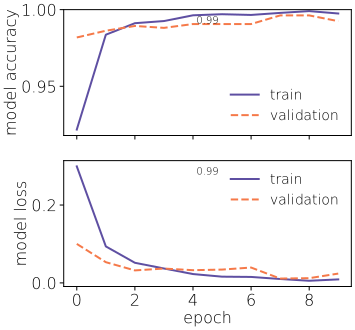

In [18]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#training
batch_size=64
epochs=10

training_history={}
training_history['Dropout']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['Dropout'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['Dropout'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['Dropout'].history['loss'], color=colors[0])
ax[1].plot(training_history['Dropout'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


In [108]:
print(Tval.shape)
T=np.pad(Tval,(1),'constant',constant_values=0)
print(T.shape)

(16000,)
(16002,)


In [122]:
print(a_1.shape[0])

14603


In [ ]:
a=model(x)
a_1=np.unique(a,axis=0)
#a_1=np.pad(a_1,(1397,0),'edge')
plt.plot(a_1[:,1],'x-',linewidth=0.5,markersize=1)
plt.legend(['T<T_c', 'T>T_c'], loc='best')

In [ ]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(6,6))

ax[0].set_ylabel('Output')
a=model(x)
a_1=np.unique(a,axis=0)
ax[0].plot(a_1[:,1],'cx-',linewidth=0.5,markersize=1)
ax[0].plot(a_1[:,0],'r^-',linewidth=0.5,markersize=1)
ax[0].legend(['T<T_c', 'T>T_c'], loc='best',frameon='True')


ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Temperature (T/J)')